In [1]:
from sklearn import datasets
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
digits = datasets.load_digits()

In [13]:
digits.data.shape

(1797, 64)

In [17]:
digits.images.shape

(1797, 8, 8)

In [19]:
digits.target.shape

(1797,)

In [37]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [45]:
digits.data.shape

(1797, 64)

In [47]:
digits.target.shape

(1797,)

In [55]:
df = pd.DataFrame(digits.data)

In [57]:
df['target'] = digits.target

In [59]:
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [43]:
from sklearn.model_selection import train_test_split

In [85]:
x_train , x_test , y_train , y_test = train_test_split(df.drop('target',axis = 'columns'), df['target'], test_size = 0.25)

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
len(y_train)

1347

In [71]:
model = KNeighborsClassifier(5)

In [89]:
model.fit(x_train , y_train)

KNeighborsClassifier()

In [91]:
model.score(x_test , y_test)

0.9911111111111112

In [97]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 48,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 48,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 47,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 37]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

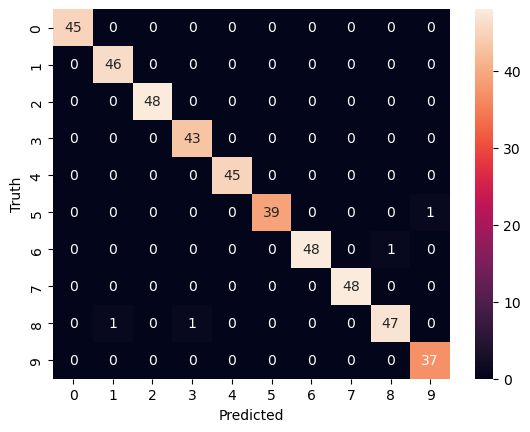

In [101]:
import matplotlib.pyplot as plt
import seaborn as sn

sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')